## Czy bochater bedzie żył??

Celem tej analizy jest stwierdzić czy bohater z kultowego serialu "Game of thrones" bedzię żył lub żyję na podstawie danych z pliku "game_og_thrones.csv".

## krok 1

Na początek zaimportujemy wszystkie potrzebnie biblioteki potrzebnie dla analizy.

In [789]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from scipy.spatial import distance_matrix
from sklearn import preprocessing
from scipy.cluster.hierarchy import ClusterWarning
import scipy.cluster
from scipy.cluster.hierarchy import dendrogram
import gower
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus



logreg = LogisticRegression()
label_encoder = preprocessing.LabelEncoder()
scaler = preprocessing.MinMaxScaler()

## krok 2

Za pomocą wbudowanej metody read_csv (biblioteka pandas) wczytujemy plik csv do zmienej "actors_data".

In [790]:
actors_data = pd.read_csv(r'C:\Users\Irakli\Desktop\GameOfThrones\character-predictions_pose.csv', sep=',' )

oraz sprawdzamy czy operacja się powiodła

In [791]:
actors_data.head()

S.No   plod                  name                 title  male   culture  \
0     1  0.946  Viserys II Targaryen                   NaN     1       NaN   
1     2  0.613           Walder Frey  Lord of the Crossing     1  Rivermen   
2     3  0.507          Addison Hill                   Ser     1       NaN   
3     4  0.924           Aemma Arryn                 Queen     0       NaN   
4     5  0.383        Sylva Santagar            Greenstone     0   Dornish   

   dateOfBirth  DateoFdeath              mother            father  ...  \
0          NaN          NaN  Rhaenyra Targaryen  Daemon Targaryen  ...   
1        208.0          NaN                 NaN               NaN  ...   
2          NaN          NaN                 NaN               NaN  ...   
3         82.0        105.0                 NaN               NaN  ...   
4        276.0          NaN                 NaN               NaN  ...   

  isAliveHeir isAliveSpouse isMarried  isNoble   age  numDeadRelations  \
0         0.0           NaN         0        0   NaN                11   
1         NaN           1.0         1        1  97.0                 1   
2         NaN           NaN         0        1   NaN                 0   
3         NaN           0.0         1        1  23.0                 0   
4         NaN           1.0         1        1  29.0                 0   

   boolDeadRelations  isPopular  popularity  isAlive  
0                  1          1    0.605351        0  
1                  1          1    0.896321        1  
2                  0          0    0.267559        1  
3                  0          0    0.183946        0  
4                  0          0    0.043478        1  

[5 rows x 30 columns]

## krok 3

Zbadamy dane jakego typu są czy w przypadku nie potrzebują konwersji.

In [792]:
actors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   plod               1946 non-null   float64
 2   name               1946 non-null   object 
 3   title              938 non-null    object 
 4   male               1946 non-null   int64  
 5   culture            677 non-null    object 
 6   dateOfBirth        433 non-null    float64
 7   DateoFdeath        444 non-null    float64
 8   mother             21 non-null     object 
 9   father             26 non-null     object 
 10  heir               23 non-null     object 
 11  house              1519 non-null   object 
 12  spouse             276 non-null    object 
 13  book1              1946 non-null   int64  
 14  book2              1946 non-null   int64  
 15  book3              1946 non-null   int64  
 16  book4              1946 

Przydatnę bedzie równierz opis danych.

In [793]:
actors_data.describe()

S.No         plod         male    dateOfBirth    DateoFdeath  \
count  1946.000000  1946.000000  1946.000000     433.000000     444.000000   
mean    973.500000     0.365530     0.619219    1577.364896    2950.193694   
std     561.906131     0.312637     0.485704   19565.414460   28192.245529   
min       1.000000     0.000000     0.000000     -28.000000       0.000000   
25%     487.250000     0.101000     0.000000     240.000000     282.000000   
50%     973.500000     0.264500     1.000000     268.000000     299.000000   
75%    1459.750000     0.608750     1.000000     285.000000     299.000000   
max    1946.000000     1.000000     1.000000  298299.000000  298299.000000   

             book1        book2        book3        book4        book5  ...  \
count  1946.000000  1946.000000  1946.000000  1946.000000  1946.000000  ...   
mean      0.198356     0.374615     0.480473     0.591984     0.395170  ...   
std       0.398864     0.484148     0.499747     0.491593     0.489013  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     1.000000     0.000000  ...   
75%       0.000000     1.000000     1.000000     1.000000     1.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       isAliveHeir  isAliveSpouse    isMarried      isNoble            age  \
count    23.000000     276.000000  1946.000000  1946.000000     433.000000   
mean      0.652174       0.778986     0.141829     0.460946   -1293.563510   
std       0.486985       0.415684     0.348965     0.498601   19564.340993   
min       0.000000       0.000000     0.000000     0.000000 -298001.000000   
25%       0.000000       1.000000     0.000000     0.000000      18.000000   
50%       1.000000       1.000000     0.000000     0.000000      27.000000   
75%       1.000000       1.000000     0.000000     1.000000      50.000000   
max       1.000000       1.000000     1.000000     1.000000     100.000000   

       numDeadRelations  boolDeadRelations    isPopular   popularity  \
count       1946.000000        1946.000000  1946.000000  1946.000000   
mean           0.305755           0.074512     0.059096     0.089584   
std            1.383910           0.262669     0.235864     0.160568   
min            0.000000           0.000000     0.000000     0.000000   
25%            0.000000           0.000000     0.000000     0.013378   
50%            0.000000           0.000000     0.000000     0.033445   
75%            0.000000           0.000000     0.000000     0.086957   
max           15.000000           1.000000     1.000000     1.000000   

           isAlive  
count  1946.000000  
mean      0.745632  
std       0.435617  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 22 columns]

## krok 4

generowanie podstawowych statistik

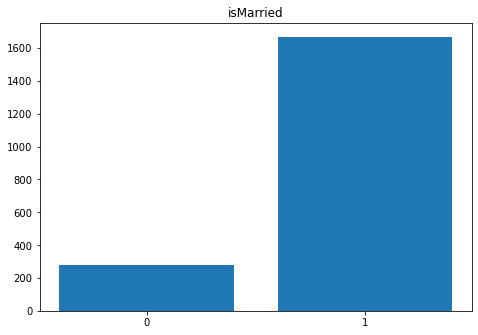

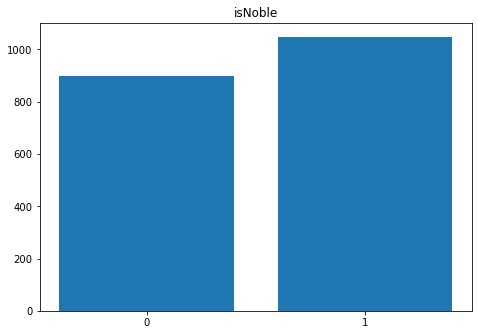

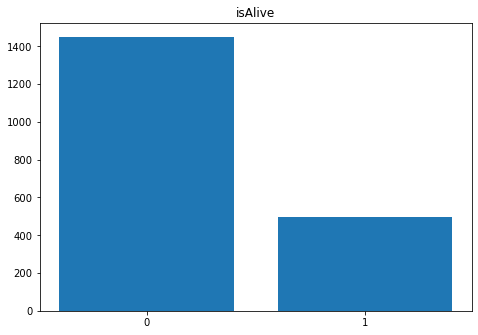

In [794]:
for x in actors_data[['isMarried','isNoble', 'isAlive']]:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    labels = [f'{list(set(actors_data[x].values))[0]}', f'{list(set(actors_data[x].values))[1]}']
    yes = len(actors_data[actors_data[x]==1])
    no = len(actors_data[actors_data[x]==0])
    ax.bar(labels,[yes, no])
    plt.title(x)
    plt.show()
    

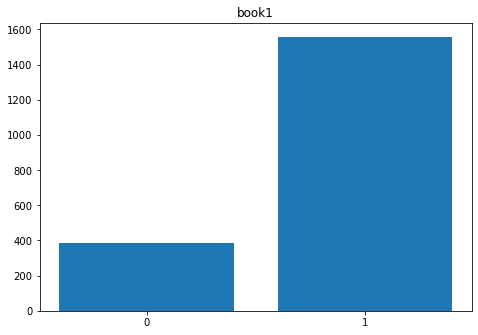

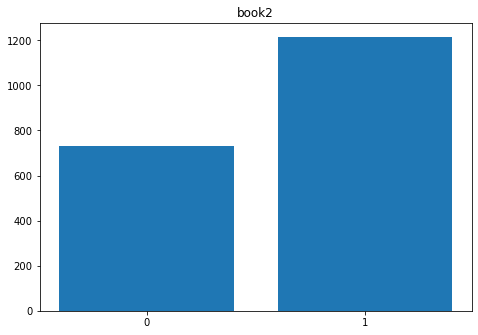

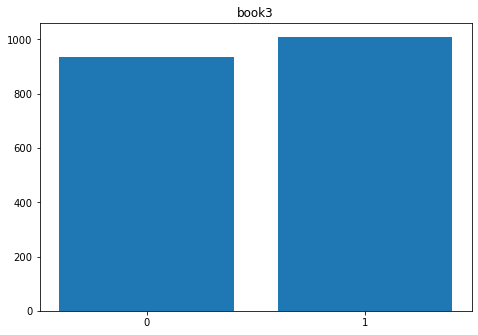

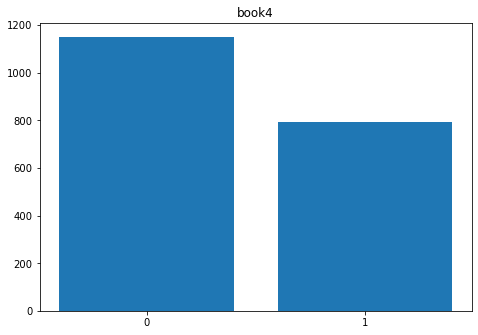

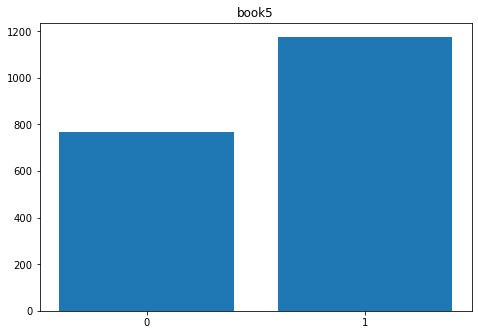

In [795]:
for x in actors_data[['book1','book2', 'book3', 'book4', 'book5']]:
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    labels = [f'{list(set(actors_data[x].values))[0]}', f'{list(set(actors_data[x].values))[1]}']
    yes = len(actors_data[actors_data[x]==1])
    no = len(actors_data[actors_data[x]==0])
    ax.bar(labels,[yes, no])
    plt.title(x)
    plt.show()

Text(0.5, 1.0, 'Popularity of actors')

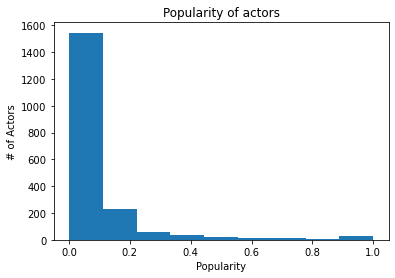

In [796]:
actors_data.popularity.hist(grid=False, bins=9)
plt.xlabel('Popularity')
plt.ylabel('# of Actors')
plt.title('Popularity of actors')

Text(0.5, 1.0, 'Number of Dead relationship')

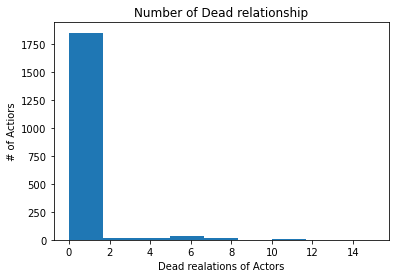

In [797]:
actors_data.numDeadRelations.hist(grid=False, bins=9)
plt.xlabel('Dead realations of Actors')
plt.ylabel('# of Actiors')
plt.title('Number of Dead relationship')

## krok 5

Zeby dowiedziec które kolumny są ważnie w analizie musimy sprawdzić wzaiemna corelację. Nailepej wygenerowac macierz korelecji

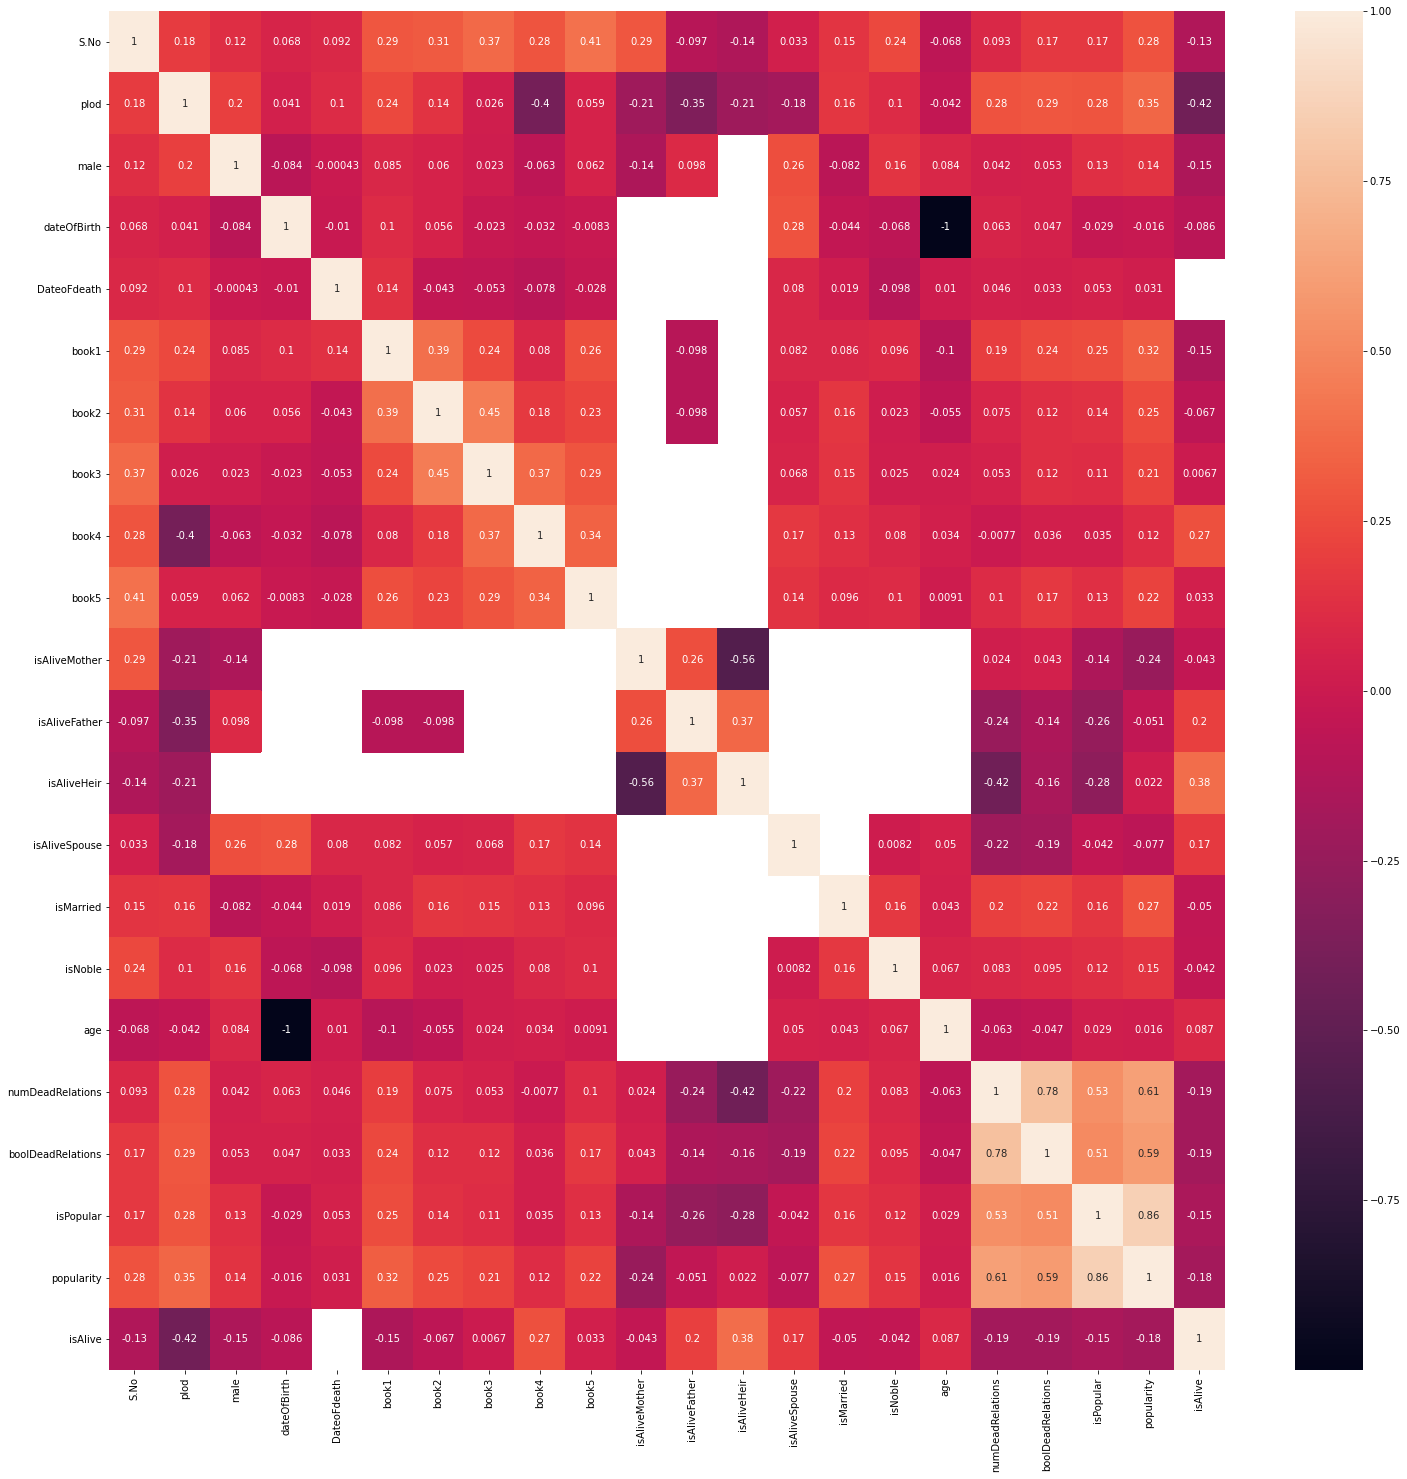

In [798]:
f,ax = plt.subplots(figsize=(25,25))
sns.heatmap(actors_data.corr(), annot = True,ax=ax)
plt.show()

Ze względu na to że celem analiy jest columna "isAlive" sprawdzamy korelacię odnośnie do niego.

isAlive              1.000000
isAliveHeir          0.384900
book4                0.268975
isAliveFather        0.195992
isAliveSpouse        0.174275
age                  0.087264
book5                0.032846
book3                0.006693
isNoble             -0.042211
isAliveMother       -0.043033
isMarried           -0.050037
book2               -0.067200
dateOfBirth         -0.085863
S.No                -0.128712
male                -0.146982
book1               -0.147401
isPopular           -0.153860
popularity          -0.183223
numDeadRelations    -0.192444
boolDeadRelations   -0.193736
plod                -0.417318
DateoFdeath               NaN
Name: isAlive, dtype: float64


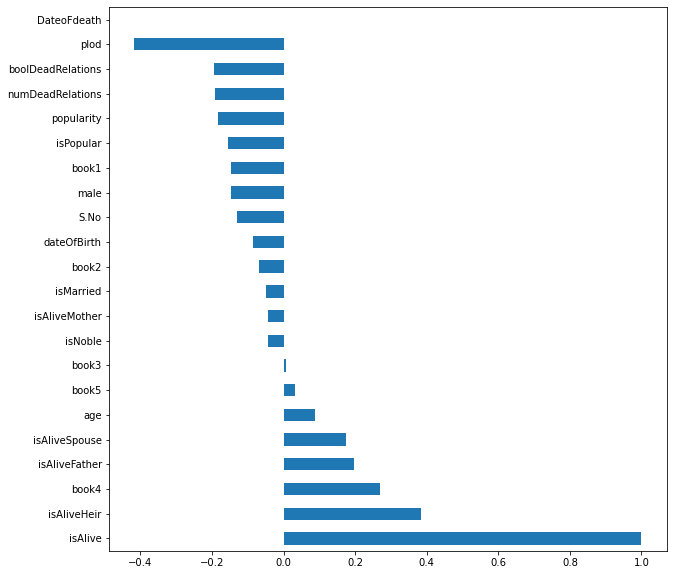

In [799]:
actors_data_corr_isAlive = actors_data.corr()['isAlive'].sort_values(ascending=False)
print(actors_data_corr_isAlive)
top_corr_features = actors_data_corr_isAlive.index
actors_data_corr_isAlive.plot(figsize=(10,10) ,kind='barh')
plt.show()

Naiwiekszą korelacją wyrużnają się columny "plod" oraz "isAliveHeir". To trzeba sprawdzić czy dane w tych columnach są kompletne.

In [800]:
clean_data = actors_data

Niestety w kulumnie "isAliveHeir" 99% wartości są puste, co dobrzę pokazuje diagram oraz obliczenia podane poniżej.

In [801]:
actors_data.isnull().sum()

S.No                    0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

In [802]:
for col in actors_data.columns:
    pct_missing = np.mean(actors_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

S.No - 0%
plod - 0%
name - 0%
title - 52%
male - 0%
culture - 65%
dateOfBirth - 78%
DateoFdeath - 77%
mother - 99%
father - 99%
heir - 99%
house - 22%
spouse - 86%
book1 - 0%
book2 - 0%
book3 - 0%
book4 - 0%
book5 - 0%
isAliveMother - 99%
isAliveFather - 99%
isAliveHeir - 99%
isAliveSpouse - 86%
isMarried - 0%
isNoble - 0%
age - 78%
numDeadRelations - 0%
boolDeadRelations - 0%
isPopular - 0%
popularity - 0%
isAlive - 0%


<AxesSubplot:>

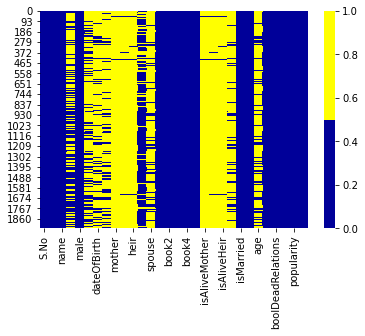

In [803]:
colours = ['#000099', '#ffff00']
sns.heatmap(actors_data[actors_data.columns].isnull(), cmap=sns.color_palette(colours))

## krok 6

Trzeba przygotować dane do analizy oczysścic lub znornalizowac. Operacja na dole usuwa wszystkie kulumny w których brak danych wynosi podan 50%.

In [804]:
for col in actors_data.columns:
    pct_missing = np.mean(actors_data[col].isnull())
    if round(pct_missing*100) > 50:
        clean_data.drop(col, axis=1, inplace=True)

In [805]:
clean_data.head()

S.No   plod                  name  male           house  book1  book2  \
0     1  0.946  Viserys II Targaryen     1             NaN      0      0   
1     2  0.613           Walder Frey     1      House Frey      1      1   
2     3  0.507          Addison Hill     1     House Swyft      0      0   
3     4  0.924           Aemma Arryn     0     House Arryn      0      0   
4     5  0.383        Sylva Santagar     0  House Santagar      0      0   

   book3  book4  book5  isMarried  isNoble  numDeadRelations  \
0      0      0      0          0        0                11   
1      1      1      1          1        1                 1   
2      0      1      0          0        1                 0   
3      0      0      0          1        1                 0   
4      0      1      0          1        1                 0   

   boolDeadRelations  isPopular  popularity  isAlive  
0                  1          1    0.605351        0  
1                  1          1    0.896321        1  
2                  0          0    0.267559        1  
3                  0          0    0.183946        0  
4                  0          0    0.043478        1

<AxesSubplot:>

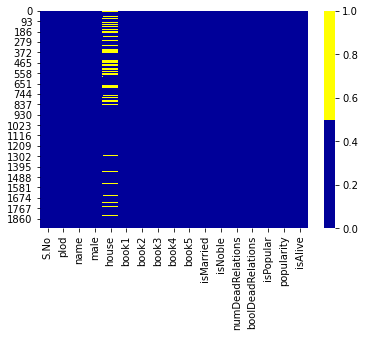

In [806]:
colours = ['#000099', '#ffff00']
sns.heatmap(clean_data[clean_data.columns].isnull(), cmap=sns.color_palette(colours))

po czysczeniu wstępnej wydac że są braki w kolumne house trzeba braki pouzupewniać lub usunąc. W tej sytuacji wartośći tej kolumny po rostu encodujemy za pomoją "label_encoder". Dla każdej wartości bedzie przypisana wartość numericzna.

In [807]:
for col in clean_data.columns:
    if np.issubdtype(clean_data[col].dtype, np.number) == False:
        if col == 'name': continue
        label_encoder.fit(clean_data[col].astype(str))
        clean_data[col] = label_encoder.transform(clean_data[col].astype(str))

nie potrzenie jest nam kolumna "S.No" poniweaż nie jest on nosnikiem wartoścowej informaji. To go usuwamy z tabeli.

In [808]:
clean_data.drop('S.No', axis=1, inplace=True)

In [809]:
clean_data = clean_data.set_index('name')

In [810]:
clean_data.head()

plod  male  house  book1  book2  book3  book4  book5  \
name                                                                          
Viserys II Targaryen  0.946     1    346      0      0      0      0      0   
Walder Frey           0.613     1    116      1      1      1      1      1   
Addison Hill          0.507     1    264      0      0      0      1      0   
Aemma Arryn           0.924     0     23      0      0      0      0      0   
Sylva Santagar        0.383     0    237      0      0      0      1      0   

                      isMarried  isNoble  numDeadRelations  boolDeadRelations  \
name                                                                            
Viserys II Targaryen          0        0                11                  1   
Walder Frey                   1        1                 1                  1   
Addison Hill                  0        1                 0                  0   
Aemma Arryn                   1        1                 0                  0   
Sylva Santagar                1        1                 0                  0   

                      isPopular  popularity  isAlive  
name                                                  
Viserys II Targaryen          1    0.605351        0  
Walder Frey                   1    0.896321        1  
Addison Hill                  0    0.267559        1  
Aemma Arryn                   0    0.183946        0  
Sylva Santagar                0    0.043478        1

W kolumnia 'house' zawiera duże wartości żeby to nie zakłuciło dziawania analizy trzeba go zascalować.

In [811]:
clean_data['house'] = scaler.fit_transform(clean_data[['house']])

Dane są gotowe dla dalszej analizy

In [812]:
clean_data

plod  male     house  book1  book2  book3  book4  \
name                                                                      
Viserys II Targaryen  0.946     1  0.997118      0      0      0      0   
Walder Frey           0.613     1  0.334294      1      1      1      1   
Addison Hill          0.507     1  0.760807      0      0      0      1   
Aemma Arryn           0.924     0  0.066282      0      0      0      0   
Sylva Santagar        0.383     0  0.682997      0      0      0      1   
...                     ...   ...       ...    ...    ...    ...    ...   
Luwin                 0.197     1  0.726225      1      1      1      1   
Reek                  0.013     1  0.129683      0      1      0      1   
Symeon Star-Eyes      0.480     1  0.997118      1      1      1      1   
Coldhands             0.363     1  0.979827      0      0      1      1   
Tytos Lannister       0.907     1  0.475504      0      0      1      1   

                      book5  isMarried  isNoble  numDeadRelations  \
name                                                                
Viserys II Targaryen      0          0        0                11   
Walder Frey               1          1        1                 1   
Addison Hill              0          0        1                 0   
Aemma Arryn               0          1        1                 0   
Sylva Santagar            0          1        1                 0   
...                     ...        ...      ...               ...   
Luwin                     1          0        0                 0   
Reek                      1          0        0                 0   
Symeon Star-Eyes          1          0        0                 0   
Coldhands                 1          0        0                 0   
Tytos Lannister           1          1        1                 4   

                      boolDeadRelations  isPopular  popularity  isAlive  
name                                                                     
Viserys II Targaryen                  1          1    0.605351        0  
Walder Frey                           1          1    0.896321        1  
Addison Hill                          0          0    0.267559        1  
Aemma Arryn                           0          0    0.183946        0  
Sylva Santagar                        0          0    0.043478        1  
...                                 ...        ...         ...      ...  
Luwin                                 0          1    0.351171        0  
Reek                                  0          0    0.096990        0  
Symeon Star-Eyes                      0          0    0.030100        1  
Coldhands                             0          0    0.130435        1  
Tytos Lannister                       1          0    0.210702        0  

[1946 rows x 15 columns]

## krok 7

Przygotowujemy model do przewidziwania. Trzeba podzielić dane na zbiór testowy i uczący. Poniżej definiujemy listy kolumn na bazie którego trzeba dokonać wnioskowanie oraz kolumnę decyziną.

In [813]:
columns_for_prediction = list(clean_data.columns)

In [814]:
columns_for_prediction = columns_for_prediction[:-1]

In [815]:
columns_for_prediction

['plod',
 'male',
 'house',
 'book1',
 'book2',
 'book3',
 'book4',
 'book5',
 'isMarried',
 'isNoble',
 'numDeadRelations',
 'boolDeadRelations',
 'isPopular',
 'popularity']

In [816]:
data_set_for_prediction = clean_data[columns_for_prediction]
target = clean_data.isAlive
X_train,X_test,y_train,y_test=train_test_split(data_set_for_prediction,target,test_size=0.25)

In [817]:
print(f"shape of original dataset : {clean_data.shape}")
print(f"shape of input - training set : { X_train.shape}",)
print(f"shape of output - training set: {y_train.shape}")
print(f"shape of input - testing set: {X_test.shape}")
print(f"shape of output - testing set: {y_test.shape}")

shape of original dataset : (1946, 15)
shape of input - training set : (1459, 14)
shape of output - training set: (1459,)
shape of input - testing set: (487, 14)
shape of output - testing set: (487,)


Pierwszyę wnioskowanie bedzie opartę na logiczną regresię.

In [818]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [819]:
y_pred=logreg.predict(X_test)

In [820]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,

Winiki wnioskowanie możemy wizualizowac i stworzyć macież pomiłek

In [821]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 56,  71],
       [ 28, 332]], dtype=int64)

In [822]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

Accuracy: 0.7967145790554415
Precision: 0.8238213399503722
Recall: 0.9222222222222223


Text(0.5, 257.44, 'Predicted label')

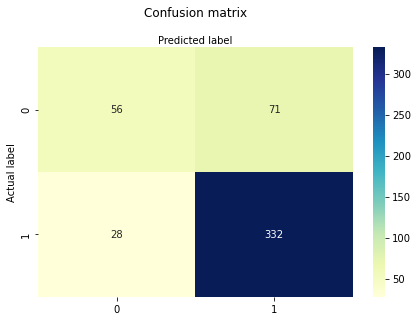

In [823]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Drugi model deciziny bedzie oparty na drzewach decizynich. Poniżey do clasifikatora przekazumey te samę dane co do logicznej regresii.

In [824]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Możemy sprawdzić wygenerowane drzewo.

In [825]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = columns_for_prediction,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('game_of_throne_tree.png')
Image(graph.create_png())

In [826]:
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

Accuracy: 0.7802874743326489
Precision: 0.8543417366946778
Recall: 0.8472222222222222


In [827]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 75,  52],
       [ 55, 305]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

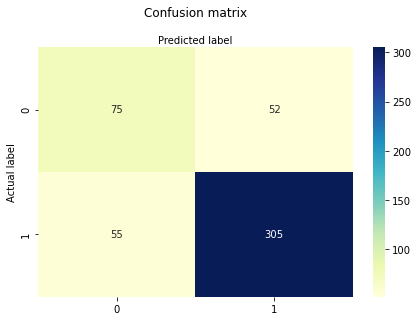

In [828]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Na koniec możemy porównać obie dwa modele i zdecodować które bardzej pasuje dla nas